In [20]:
import numpy  as np
import pandas as pd

print('numpy  version - ' , np.__version__) 
print('pandas version - ' , pd.__version__) 

from   io import StringIO
import missingno as msno
# ml
import sklearn
from   sklearn.datasets import load_iris, load_breast_cancer

print('sklearn version - ' , sklearn.__version__)

from sklearn.model_selection import train_test_split, KFold , StratifiedKFold , cross_val_score, cross_validate, GridSearchCV 
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier         
from sklearn.linear_model    import LogisticRegression , LinearRegression


from sklearn.metrics         import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer , precision_recall_curve 
from sklearn.impute          import SimpleImputer

from sklearn.preprocessing   import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from IPython.display import Image

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

numpy  version -  1.20.3
pandas version -  1.3.4
sklearn version -  0.24.2


#### Regression(회귀)
- 회귀란 종속변수(target)와 하나이상의 독립변수(feature)간의 관계를 모델링하는 선형 또는 비선형 접근법 
- 예측이고 예측을 위해서는 종속변수의 타입은 연속된 숫자이여야 한다
- 회귀분석은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법이다.
- Y = (w * x) + b
- w : weight , b : bias
- cost(w, b) - 업데이트를 통해서 예측값과 실제값의 차이를 계산
- 회귀계수 : coefficients -> 독립변수가 종속변수에 미치는 영향의 강도
- 회귀유형 : 독립변수 1개이면    단일회귀 - 선형회귀
- 회귀유형 : 독립변수 여러개이면 다중회귀 - 비선형회귀


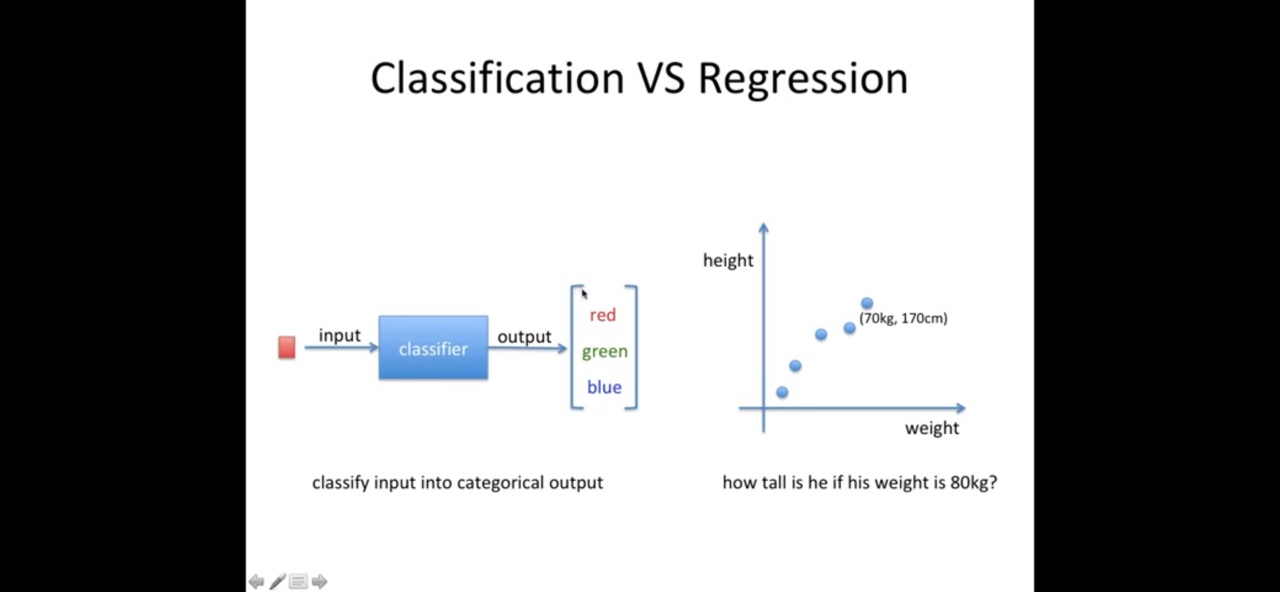

In [3]:
Image("c:/linear_img/linear01.png.jpg" , width = 700)

In [6]:
print('단일회귀 - ') 
print()
frm = pd.DataFrame({
  "height" : [1.47, 1.50, 1.52, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70, 1.75, 1.78, 1.80, 1.83],
  "mass"   : [52.21, 53.12, 54.48, 55.84, 57.20, 58.57, 59.93, 61.29, 63.11, 64.47, 66.28, 68.10, 68.92]
})
frm

단일회귀 - 



,height,mass
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.57,55.84
4,1.60,57.20
5,1.63,58.57
6,1.65,59.93
7,1.68,61.29
8,1.70,63.11
9,1.75,64.47


In [10]:
print("독립변수 또는 설명변수 - ") 
print('type - ' , type(frm[['height']]) , frm[['height']].shape)
X = frm[['height']]

독립변수 또는 설명변수 - 
type -  <class 'pandas.core.frame.DataFrame'> (13, 1)


In [11]:
print("종속변수 - ") 
print('type - ' , type(frm[['mass']]) , frm[['mass']].shape)
Y = frm[['mass']]

종속변수 - 
type -  <class 'pandas.core.frame.DataFrame'> (13, 1)


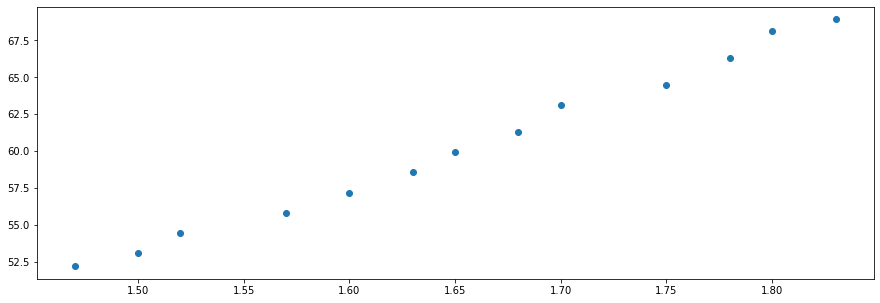

In [15]:
plt.figure(figsize=(15,5))

plt.plot(X, Y, 'o')

plt.show()
plt.close()

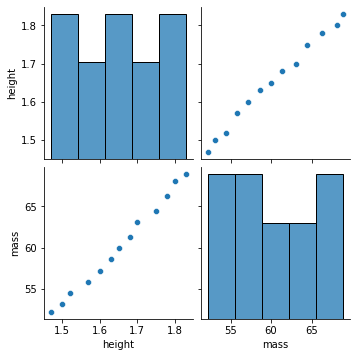

In [18]:
sns.pairplot(frm)
plt.show()
plt.close()

In [22]:
linear_model = LinearRegression()
linear_model.fit(X, Y)

LinearRegression()

In [24]:
print('사용자 데이터를 입력하여 예측값을 확인 - ') 
user_pred = linear_model.predict([[1.79]])
print('user pred - ' , user_pred)
y_pred = linear_model.predict(X)
print('y_pred - ' , y_pred)


사용자 데이터를 입력하여 예측값을 확인 - 
user pred -  [[66.83377973]]
y_pred -  [[51.58119667]
 [53.01112633]
 [53.96441277]
 [56.34762888]
 [57.77755854]
 [59.2074882 ]
 [60.16077464]
 [61.5907043 ]
 [62.54399075]
 [64.92720685]
 [66.35713651]
 [67.31042295]
 [68.74035261]]


In [27]:
print("w = 기울기 : " , linear_model.coef_)
print()
print('b = 절편   : ' , linear_model.intercept_)

w = 기울기 :  [[47.66432207]]

b = 절편   :  [-18.48535678]


In [29]:
(47.66432207 * 1.79) + -18.48535678

66.83377972529999

In [30]:
print("R - squared(결정계수) - ")
print()
print('R = ' , linear_model.score(X,Y)) 

R - squared(결정계수) - 

R =  0.9921046478305534


In [32]:
y_pred = linear_model.predict(X)
y_pred

array([[51.58119667],
       [53.01112633],
       [53.96441277],
       [56.34762888],
       [57.77755854],
       [59.2074882 ],
       [60.16077464],
       [61.5907043 ],
       [62.54399075],
       [64.92720685],
       [66.35713651],
       [67.31042295],
       [68.74035261]])

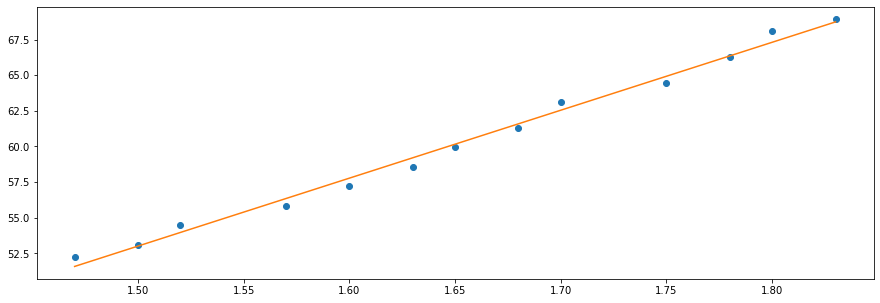

In [33]:
plt.figure(figsize=(15,5))

plt.plot(X, Y, 'o')
plt.plot(X, y_pred)

plt.show()
plt.close()

In [35]:
mpg_frm = pd.read_csv('./data/auto-mpg.csv' , header = None)
mpg_frm.columns = ['mpg', 'cylinders' , 'displacement', 'horsepower', 'weight', 'acc', 'model year', 'origin', 'name'] 

In [37]:
mpg_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acc           398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [38]:
mpg_frm.describe()

,mpg,cylinders,displacement,weight,acc,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [44]:
mpg_frm['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [45]:
mpg_frm['horsepower'].replace('?' , np.NaN , inplace = True)

In [46]:
mpg_frm['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [48]:
mpg_frm.dropna(subset=['horsepower'] , axis=0 , inplace = True)

In [49]:
mpg_frm['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [50]:
mpg_frm['horsepower'] = mpg_frm['horsepower'].astype('float')
mpg_frm['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [52]:
mpg_frm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acc           392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [54]:
print('다중회귀 - ')
mpg_subset_frm = mpg_frm[['mpg', 'cylinders', 'horsepower' , 'weight']]
mpg_subset_frm

다중회귀 - 


,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0
...,...,...,...,...
393,27.0,4,86.0,2790.0
394,44.0,4,52.0,2130.0
395,32.0,4,84.0,2295.0
396,28.0,4,79.0,2625.0


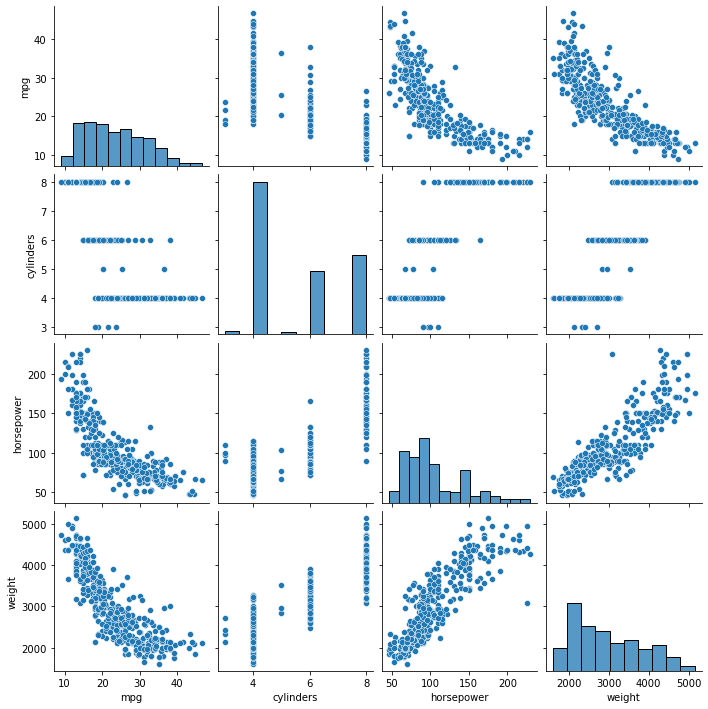

In [55]:
sns.pairplot(mpg_subset_frm)
plt.show()
plt.close()

In [57]:
print('종속변수 독립변수 분리 - ') 
print('종속변수 - ')
Y = mpg_subset_frm['mpg']
print('독릷변수 - ')
X = mpg_subset_frm[['cylinders' , 'horsepower' , 'weight']] 


종속변수 독립변수 분리 - 
종속변수 - 
독릷변수 - 


In [58]:
X_train, X_test , y_train, y_test = train_test_split(X, Y,
                                                     test_size = 0.2,
                                                     random_state = 111) 
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((313, 3), (79, 3), (313,), (79,))

In [60]:
mpg_linear_model = LinearRegression()
mpg_linear_model.fit(X_train, y_train)
print("w = 기울기 : " , mpg_linear_model.coef_)
print()
print('b = 절편   : ' , mpg_linear_model.intercept_)

w = 기울기 :  [-0.15188535 -0.0589312  -0.00530238]

b = 절편   :  46.34299652357524


In [61]:
print('모델의 신뢰도 - score')
r_squared = mpg_linear_model.score(X_test, y_test)
print(r_squared)

모델의 신뢰도 - score
0.7138561071545961


In [62]:
print('예측 - ')
y_pred = mpg_linear_model.predict(X_test)
y_pred

예측 - 


array([ 5.61631879,  8.89016346, 27.2669089 , 31.88069281, 23.77003928,
       31.37849609, 30.13820164, 19.94235449, 24.98243948, 24.2272539 ,
       26.6760677 , 14.3628994 , 17.07316274, 20.29093108, 22.69518569,
       27.83696941, 29.94503882,  7.3509445 , 16.34598892, 31.76450258,
       10.44191195, 29.30572823, 25.88252605, 16.37780319, 27.60231175,
       22.823972  , 26.82150912, 26.08717864, 28.6162761 , 27.89180831,
       28.47780922, 25.22563616, 18.88732413, 12.87520827, 25.33168373,
       12.12227054, 10.13846631, 15.65137735, 26.27429701, 26.736814  ,
       27.54384265, 30.27802152, 31.33956433, 24.81158265, 24.81265568,
       27.16246498, 31.20291257, 14.08536062,  7.98722991, 22.20053528,
       33.09433243, 24.08743401, 31.36789133, 19.76371842, 32.30171496,
       26.23187798, 15.39686319, 23.21073237, 29.70643179,  7.20215875,
       20.72255209,  9.07649468, 21.84983033, 29.25544374, 20.84163046,
       28.72428171, 29.30572823, 32.68498216, 30.30150824, 32.65

In [63]:
regression_actual_guess = pd.DataFrame({
    'actual' : y_test , 
    'guess'  : y_pred
})
regression_actual_guess

,actual,guess
95,12.0,5.616319
116,16.0,8.890163
273,23.9,27.266909
195,29.0,31.880693
194,22.5,23.770039
...,...,...
251,20.2,18.006986
201,18.5,19.622083
160,17.0,18.232860
210,19.0,23.531146
